In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/test.csv


# Read Data

In [2]:
train_df =pd.read_csv('/kaggle/input/Kannada-MNIST/train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# seperate label Convert to numpy and reshape

In [3]:
y=train_df['label']
y= y.to_numpy()
y.shape

(60000,)

In [4]:
x=train_df.iloc[:,1:]
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x=x.to_numpy()
print ('x shape',x.shape)
x=x.reshape(x.shape[0],28,28)
print ('x shape',x.shape)

x shape (60000, 784)
x shape (60000, 28, 28)


# Explore few images

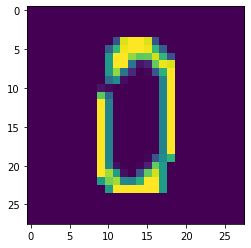

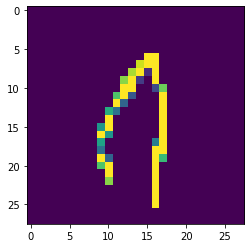

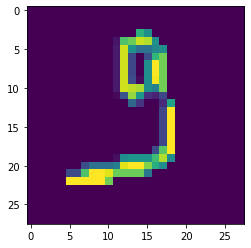

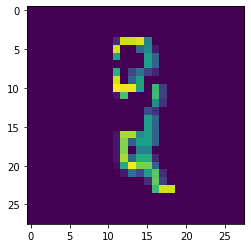

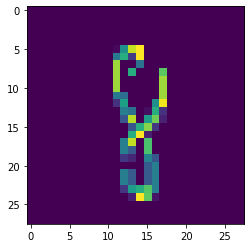

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
for i in range(10,15):
    img = x[i]
    plt.imshow(img)
    plt.show()

# one hot encoding of labels

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
print (y)
print (y.shape)

[0 1 2 ... 7 8 9]
(60000,)


In [9]:
y[123]

3

In [10]:
array_y = y.reshape(y.shape[0],1)
print (array_y)
print (array_y.shape)

[[0]
 [1]
 [2]
 ...
 [7]
 [8]
 [9]]
(60000, 1)


In [11]:
y[123]

3

In [12]:
o = OneHotEncoder()
encoded_y = o.fit_transform(array_y).toarray()
print ('encoded_y',encoded_y)
print ('encoded_y shape',encoded_y.shape)

print (o.categories_)

encoded_y [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
encoded_y shape (60000, 10)
[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]


In [13]:
encoded_y[123]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

# Another way to one hot encode using keras

In [14]:
from keras.utils.np_utils import to_categorical

In [15]:
keras_encoded_y = to_categorical(y,10)
print ('keras_encoded_y.shape',keras_encoded_y.shape)
print (keras_encoded_y )

keras_encoded_y.shape (60000, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [16]:
keras_encoded_y[123]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Normalize image

In [17]:

print ('x shape',x.shape)

x shape (60000, 28, 28)


In [18]:
x[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [19]:
#sklearn can deal only with 2d arrays
reshaped_x = x.reshape(x.shape[0],x.shape[1]*x.shape[2])
reshaped_x.shape

(60000, 784)

In [20]:
reshaped_x[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [21]:
from sklearn.preprocessing import normalize
normalized_x = normalize(reshaped_x)
normalized_x


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
reshaped_normalized_x= normalized_x.reshape(normalized_x.shape[0],28,28)
reshaped_normalized_x.shape

(60000, 28, 28)

In [23]:
reshaped_normalized_x[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
tes_norm_x = x/255
tes_norm_x[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Train test split

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(reshaped_normalized_x,keras_encoded_y, test_size=0.3)
print ('x_train shape',x_train.shape)
print ('x_test shape',x_test.shape)
print ('y_train shape',y_train.shape)
print ('y_test shape',y_test.shape)

x_train shape (42000, 28, 28)
x_test shape (18000, 28, 28)
y_train shape (42000, 10)
y_test shape (18000, 10)


In [26]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_train.shape

(42000, 28, 28, 1)

# create model

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

model = Sequential()
model.add (Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1)))
model.add (MaxPool2D(pool_size=(2,2)))
model.add (Conv2D(64,kernel_size=(3,3)))
model.add (MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop',loss='CategoricalCrossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

2022-08-17 03:41:25.084194: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [28]:
model.fit(x_train,y_train, epochs=8)

2022-08-17 03:41:25.591312: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/8
1313/1313 [==============================] - 19s 14ms/step - loss: 0.1251 - accuracy: 0.9635
Epoch 2/8
1313/1313 [==============================] - 18s 13ms/step - loss: 0.0442 - accuracy: 0.9864
Epoch 3/8
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0330 - accuracy: 0.9895
Epoch 4/8
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0271 - accuracy: 0.9916
Epoch 5/8
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0235 - accuracy: 0.9921
Epoch 6/8
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0225 - accuracy: 0.9931
Epoch 7/8
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0186 - accuracy: 0.9938
Epoch 8/8
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0176 - accuracy: 0.9945


In [29]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_test.shape

(18000, 28, 28, 1)

In [30]:
test_pred = model.predict(x_test)

In [31]:
test_pred.shape

(18000, 10)

In [32]:
test_pred[0]

array([1.0411532e-15, 1.6697381e-11, 4.9981839e-13, 1.4266108e-10,
       1.8851649e-09, 1.0000000e+00, 5.6294879e-25, 5.0037200e-19,
       8.0477339e-14, 4.0586913e-21], dtype=float32)

prediction 5
real_label 5


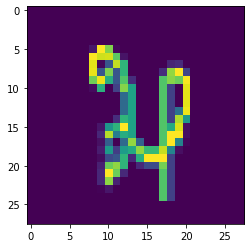

prediction 3
real_label 3


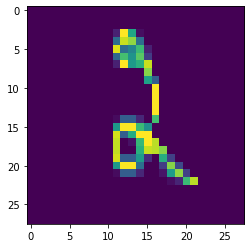

prediction 7
real_label 7


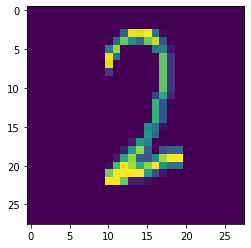

prediction 8
real_label 8


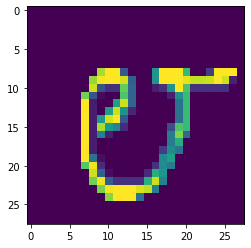

prediction 4
real_label 4


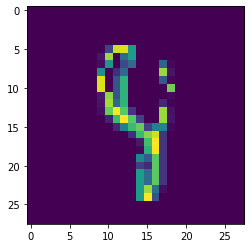

prediction 4
real_label 4


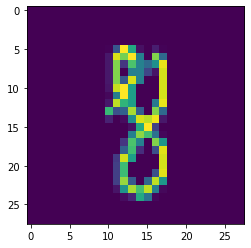

prediction 1
real_label 1


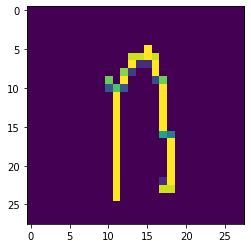

prediction 6
real_label 6


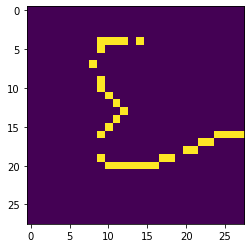

prediction 7
real_label 7


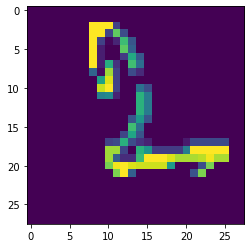

prediction 9
real_label 9


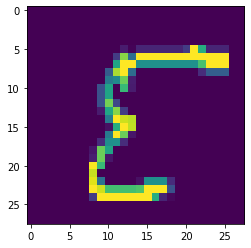

In [33]:
for i in range(10):
    prediction = np.argmax(test_pred[i])
    print ('prediction',prediction)
    real_label = np.argmax(y_test[i])
    print ('real_label',real_label)
    img = x_test[i]
    plt.imshow(img)
    plt.show()

In [34]:
all_test_prediction = np.argmax(test_pred,axis=1)
all_test_prediction.shape

(18000,)

In [35]:
all_test_prediction

array([5, 3, 7, ..., 3, 7, 0])

In [36]:
all_test_true = np.argmax(y_test,axis=1)
all_test_true.shape

(18000,)

In [37]:
all_test_true

array([5, 3, 7, ..., 3, 7, 0])

In [38]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(all_test_true,all_test_prediction)
con

array([[1767,   13,    1,    2,    0,    0,    0,    0,    3,    0],
       [   3, 1786,    0,    0,    0,    0,    0,    0,    0,    1],
       [   9,    1, 1816,    2,    0,    0,    0,    0,    0,    0],
       [   6,    1,    1, 1789,    1,    0,    0,    3,    0,    0],
       [   1,    0,    0,    1, 1776,    1,    1,    0,    1,    0],
       [   0,    3,    0,   11,    6, 1806,    0,    0,    1,    0],
       [   0,    0,    0,    1,    1,    0, 1821,    7,    0,    1],
       [   3,    2,    2,   14,    0,    1,   36, 1739,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0, 1800,    0],
       [   2,    0,    1,    0,    2,    0,   25,    0,    5, 1723]])

# Predict on test csv

In [39]:
test_df = pd.read_csv('/kaggle/input/Kannada-MNIST/test.csv')
test_df.shape

(5000, 785)

In [40]:
test_df.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
result_df = test_df[['id']]
result_df

,id
0,0
1,1
2,2
3,3
4,4
...,...
4995,4995
4996,4996
4997,4997
4998,4998


In [42]:
test_df= test_df.iloc[:,1:]
test_df.shape

(5000, 784)

In [43]:
test_df_numpy = test_df.to_numpy()
test_df_numpy.shape

(5000, 784)

In [44]:
normalized_test_df_numpy = normalize(test_df_numpy)
normalized_test_df_numpy.shape

(5000, 784)

In [45]:
reshaped_normalized_test_df_numpy = normalized_test_df_numpy.reshape(normalized_test_df_numpy.shape[0],28,28)
reshaped_normalized_test_df_numpy.shape

(5000, 28, 28)

In [46]:
reshaped_normalized_test_df_numpy_for_cnn = reshaped_normalized_test_df_numpy.reshape(reshaped_normalized_test_df_numpy.shape[0],28,28,1)
reshaped_normalized_test_df_numpy_for_cnn.shape

(5000, 28, 28, 1)

In [47]:
test_csv_prediction = model.predict(reshaped_normalized_test_df_numpy_for_cnn)

In [48]:
test_csv_prediction

array([[5.2265180e-12, 4.5137390e-15, 9.5887924e-12, ..., 1.5335155e-11,
        3.3646836e-21, 1.2139478e-16],
       [9.9999678e-01, 3.0524786e-06, 6.6585765e-10, ..., 8.4927487e-14,
        8.3247933e-08, 1.6223380e-11],
       [2.2501308e-17, 4.4620772e-20, 1.0000000e+00, ..., 4.5022917e-20,
        2.8227270e-17, 2.6659720e-21],
       ...,
       [5.5984260e-06, 9.9999440e-01, 1.3163632e-17, ..., 3.9143205e-14,
        1.3417548e-14, 2.5861601e-23],
       [1.5164765e-14, 8.4326008e-17, 3.0692517e-13, ..., 2.1283743e-07,
        1.4544412e-15, 7.4850037e-10],
       [1.1847699e-10, 2.6458983e-12, 3.6025766e-10, ..., 4.3479426e-13,
        1.1860789e-18, 1.9422555e-13]], dtype=float32)

In [49]:
final_test_csv_prediction =test_csv_prediction.argmax(axis=1)
final_test_csv_prediction.shape

(5000,)

In [50]:
final_test_csv_prediction

array([3, 0, 2, ..., 1, 6, 3])

In [51]:
result_df ['label'] = final_test_csv_prediction

In [52]:
result_df.to_csv('submission.csv',index=False)